# 1. 데이터 읽기

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# 2. 모델 만들기

## 2.1 군집화 정보 확인

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=10)
kmeans.fit(iris.data)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## 2.2 기존 데이터와 비교

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


> 군집화를 통해 분류한 값과 기존 데이터의 차이에 대해 알아 보도록 하자.

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['cluster'] = kmeans.labels_

In [5]:
df.groupby(['target', 'cluster'])['sepal length (cm)'].count()

target  cluster
0       1          50
1       0           3
        2          47
2       0          36
        2          14
Name: sepal length (cm), dtype: int64

> 원본 데이터에서 분류한 0번과 새로 군집화한 1번 데이터가 50개로 동일한 것을 볼 수 있다. 원본 데이터의 1은 군집데이터에서 0번 두 개와 2번 48개로 적당히 분류되어 있는 것을 볼 수 있다. 마지막 데이터인 원본 2번이 군집 데이터 0번 36개, 2번 14개로 분류가 잘 안된 것을 볼 수 있다.

# 3. 시각화

## 3.1 표준화

In [6]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris.data)

## 3.2 차원 축소

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_scaled)
pca_transformed

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

## 3.3 feature 추가

In [8]:
df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:, 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


## 3.4 시각화

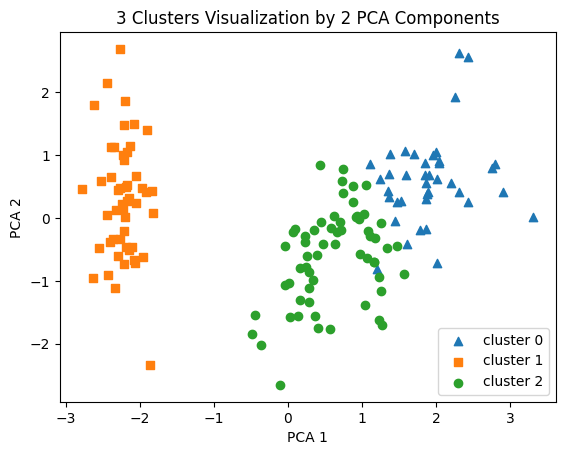

In [10]:
import matplotlib.pyplot as plt

markers = ['^', 's', 'o']

for i, markers in enumerate(markers):
    x = df[df['cluster'] == i]['pca_x']
    y = df[df['cluster'] == i]['pca_y']
    plt.scatter(x, y, marker=markers)
    
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(('cluster 0', 'cluster 1', 'cluster 2'))
plt.show()

## 3.5 index를 이용한 시각화

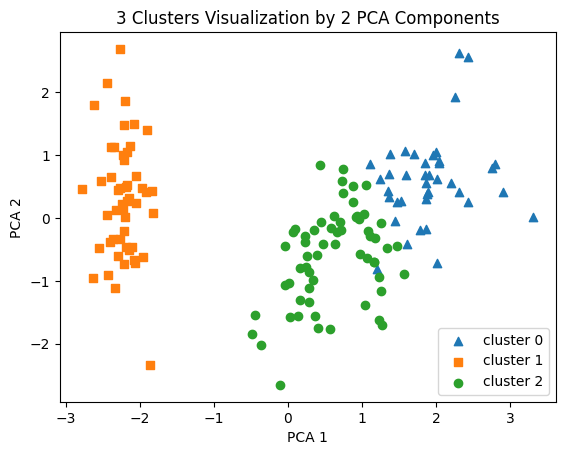

In [11]:
markers = ['^', 's', 'o']

for i, markers in enumerate(markers):
    marker_idx = df[df['cluster'] == i].index
    plt.scatter(x=df.loc[marker_idx, 'pca_x'], y=df.loc[marker_idx, 'pca_y'], marker=markers)
    
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(('cluster 0', 'cluster 1', 'cluster 2'))
plt.show()